# Casos de test generados aleatoriamente

In [1]:
import random

In [2]:
random.seed(2019)

In [3]:
ns = list(range(1,31,1))

In [4]:
resistencias = [1, 10, 20, 50, 75, 100]

In [5]:
def crear_test(n):
    pares = list()
    for i in range(n):
        w, r = random.randint(1, 30), random.randint(1, 50)
        pares.append([w, r])
    return pares

In [6]:
with open('tests3_tp1.txt', 'a') as file:
    for r in resistencias:
        for n in ns:
            file.write("{} {}\n".format(n, r))
            for p in crear_test(n):
                file.write("{} {}\n".format(p[0], p[1]))
            file.write("\n")

# Analisis

## - Performance de cada uno
## - Comparacion entre ellos

In [1]:
from matplotlib import pyplot as plt, cm
import numpy as np
import pandas as pd
import seaborn as sns

## Graficos y demas
### FB

In [37]:
results_fb = pd.read_csv('resultados/results_fb.txt', delimiter=' ')
results_fb['esperado'] = 2 ** results_fb['n'] * 20 / 1000000
results_fb['ms'] = results_fb['t'] / 1000000

[Text(0, 0.5, 'tiempo (ms)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Fuerza Bruta')]

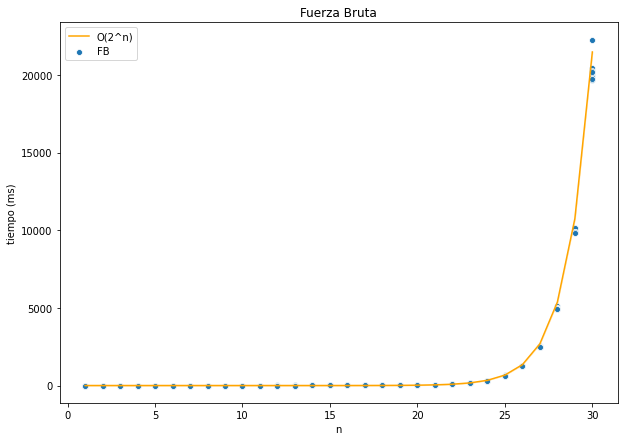

In [56]:
y = results_fb.ms.tolist()
x = results_fb.n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
fig_fb = sns.lineplot(data=results_fb, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Fuerza Bruta", xlabel='n', ylabel='tiempo (ms)')

### Correlacion entre t_ej y t_esp

In [78]:
results_fb['cor'] = results_fb['ms'].corr(results_fb['esperado'])

In [85]:
results_fb.corr()[['esperado']]

,esperado
test_set,0.000000e+00
n,5.199042e-01
r,1.961195e-17
res,2.015173e-01
t,9.996351e-01
esperado,1.000000e+00
ms,9.996351e-01
cor,-2.258755e-16


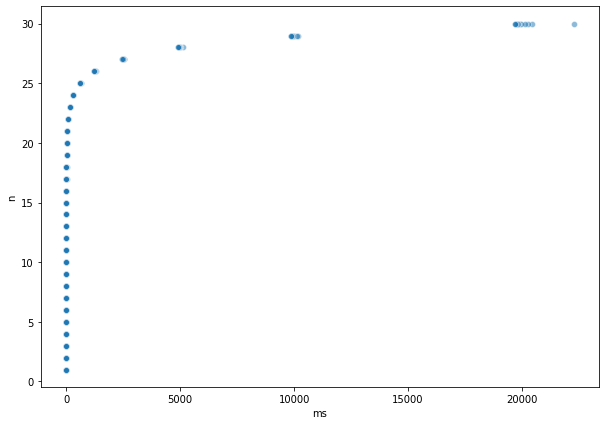

In [76]:
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(results_fb['ms'], results_fb['n'], alpha=0.5)

---
## BTF

In [68]:
results_btf = pd.read_csv('resultados/results_btf.txt', delimiter=' ')
results_btf['esperado'] = (2 ** results_btf['n']) * 0.03/1000000
results_btf['ms'] = results_btf['t'] / 1000000

[Text(0, 0.5, 'tiempo (ms)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Backtracking Factibilidad')]

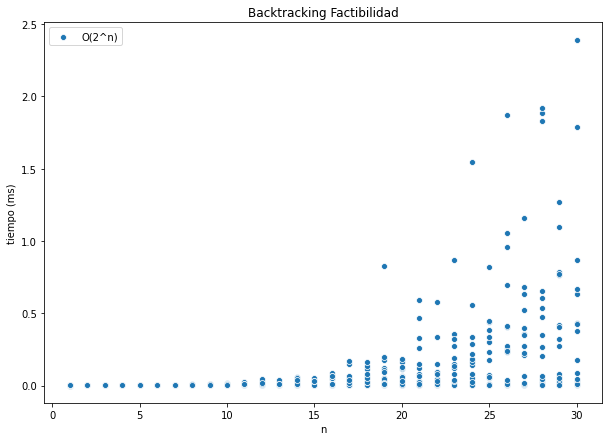

In [70]:
y = results_btf.ms.tolist()
x = results_btf.n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
# fig_fb = sns.lineplot(data=results_btf, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ms)')

In [87]:
results_btf.corr()['esperado']

test_set   -1.250722e-18
n           5.199042e-01
r           1.094417e-17
res         2.015173e-01
t           3.702506e-01
esperado    1.000000e+00
ms          3.702506e-01
Name: esperado, dtype: float64

---
## BTO

In [33]:
results_bto = pd.read_csv('resultados/results_bto.txt', delimiter=' ')
results_bto['esperado'] = 2 ** results_bto['n'] * 0.01/1000000
results_bto['ms'] = results_bto['t'] / 1000000

[Text(0, 0.5, 'tiempo (ms)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Backtracking Factibilidad')]

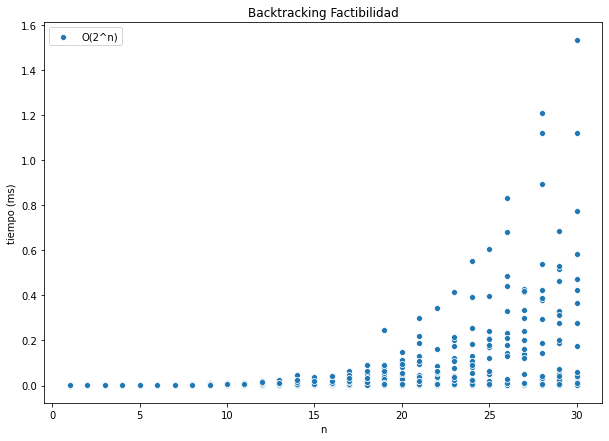

In [71]:
y = results_bto.ms.tolist()
x = results_bto.n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
# fig_fb = sns.lineplot(data=results_bto, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(2^n)','FB'])
fig_fb.set(title="Backtracking Factibilidad", xlabel='n', ylabel='tiempo (ms)')

y = results_bto.loc[results_bto.r==100].t.tolist()
x = results_bto.loc[results_bto.r==100].n.tolist()
sns.scatterplot(x, y)
plt.title("Backtracking podas por optimalidad")
plt.xlabel("n")
plt.ylabel("tiempo (nanosegundos)")
plt.show()

---
## PD

In [45]:
results_pd = pd.read_csv('resultados/results_dp.txt', delimiter=' ')
results_pd['esperado'] = results_pd['n'] * results_pd['r'] * 44 / 1000000
results_pd['ms'] = results_pd['t'] / 1000000

### Tiempo de ejecucion vs esperada

[Text(0, 0.5, 'tiempo (ms)'),
 Text(0.5, 0, 'n'),
 Text(0.5, 1.0, 'Programacion dinamica')]

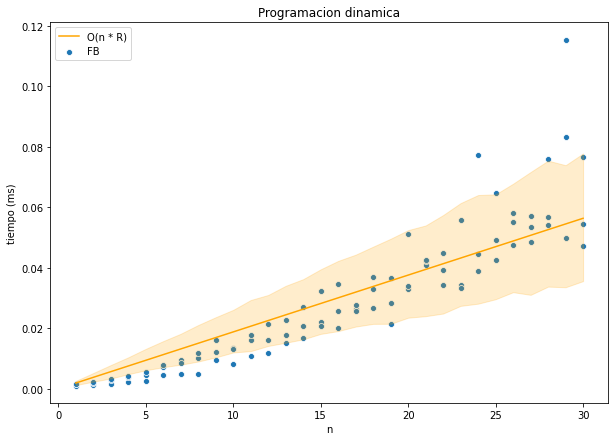

In [46]:
y = results_pd.loc[results_pd.r==100].ms.tolist()
x = results_pd.loc[results_pd.r==100].n.tolist()
plt.figure(figsize=(10, 7))
fig_fb = sns.scatterplot(x, y)
fig_fb = sns.lineplot(data=results_pd, x='n', y='esperado', color="orange")
fig_fb.legend(labels=['O(n * R)','FB'])
fig_fb.set(title="Programacion dinamica", xlabel='n', ylabel='tiempo (ms)')

### Correlacion entre tiempo de ejecucion y esperada

---
---

## Comparacion entre todos

In [ ]:
1000000

In [10]:
results_fb['ms'] = results_fb['t'] / 1000000

In [12]:
results_fb.tail(10)

,test_set,n,r,res,t,esperado,ms
530,3,21,100,6,38452867,41943040,38.452867
531,3,22,100,6,76823127,83886080,76.823127
532,3,23,100,6,159541372,167772160,159.541372
533,3,24,100,10,308220422,335544320,308.220422
534,3,25,100,7,615333431,671088640,615.333431
535,3,26,100,6,1230566372,1342177280,1230.566372
536,3,27,100,7,2462944888,2684354560,2462.944888
537,3,28,100,7,4922852697,5368709120,4922.852697
538,3,29,100,9,9848897174,10737418240,9848.897174
539,3,30,100,6,19705838379,21474836480,19705.838379
